# Marr-Hildreth Edge Detection


# Local Edge Operators

# Reminder: Laplacian Operator

The Laplacian is a 2D equivalent of the second derivative.  
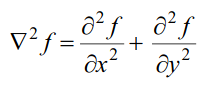



# Marr and Hildreth


David Marr (neuroscientist and physiologist) and Ellen C. Hildreth (Mathematical and Computer Science Master) proposed the theory of the edge detection at the end of 70's and beggining of 80's. 

The disadvantage of Local Edge Operators is that they are very sensitive to noise. So, Marr and Hildreth proposed a Gaussian Filter to filter the noise before enhancement is performed. Why? 
Because they wanted a filter where the $\Delta \omega$ was small and the $\Delta x$ was small as well. In other words a filter that reduces the range of scales which over the instensity changes take place and smoother and localized. Those conditions are conflicting. in fact they are related by the uncertainty principle, which states:
$\Delta \omega \Delta x \geq\frac{1}{4}$ Then they combined the Gaussian filter with the Laplacian operator for edge detection. 

Basically, the Laplacian of Gaussian (LOG) algorithm's characteristics are: 

1. Smooth Gaussian Filter for removing noise. 
2. Use Laplacian (Enhancement)
3. **Detection Criteria**: zero crossing in the second derivative. 


# Algorithm 


$ \nabla^2 G(x,y) * I(x,y) $ where $G(x,y)$ 2D Gaussian Distribution,  $\nabla^2$ is the Laplacian operator and $I$ is the target image.



$ \nabla^2 G(x,y) * I(x,y)  =  \frac{(x^2 + y^2-2 \sigma^2)}{\sigma^4} e^\frac{- (x^2 + y^2)}{2\sigma^2} $


The LOG Filter is also called the Mexican hat operator, and the algorithm works as follow [4]:

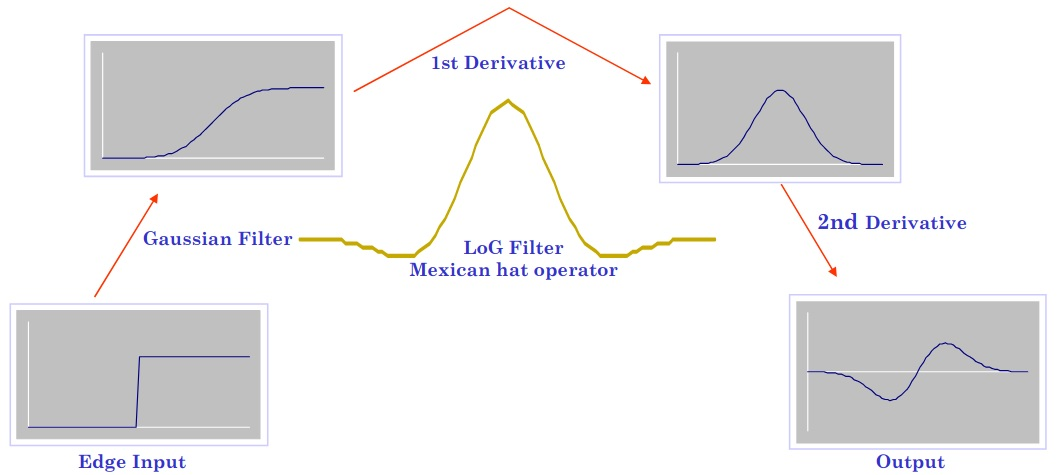

## Example


In [1]:
# import necessary libs
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage import color
from mpl_toolkits.mplot3d import Axes3D

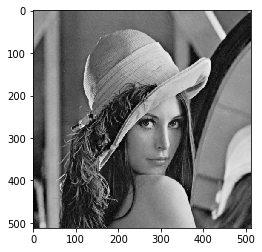

In [2]:
# import image
img = io.imread('lenna.png')
img_orig = color.rgb2gray(img)
img = color.rgb2gray(img)
mgplot = plt.imshow(img, cmap='gray')


In [3]:
#Define Sigma
sigma = 8

In [4]:
# Apply Laplacian of Gaussian filter
# Kernel Window Size 
size = int(2*(np.ceil(3*sigma))+1)

# Kernel Window coordenates 
x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),np.arange(-size/2+1, size/2+1))

normal = 1 / (2.0 * np.pi * sigma**2)

# Laplacian Gaussian Filter
kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * \
    np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal  

kern_size = kernel.shape[0]
print('Kernel Size: ', kern_size)

log = np.zeros_like(img, dtype=float)

# applying filter
for i in range(img.shape[0]-(kern_size-1)):
    for j in range(img.shape[1]-(kern_size-1)):
        window = img[i:i+kern_size, j:j+kern_size] * kernel
        log[i, j] = np.sum(window)

log = log.astype(np.int64, copy=False)


    

Kernel Size:  49


In [5]:
# Zero Crossing process
zero_crossing = np.zeros_like(log)

print('Filtered image first elment size: ', log.shape[0])
print('Filtered image second elment size: ', log.shape[1])
# computing zero crossing
for i in range(log.shape[0]-(kern_size-1)):
    for j in range(log.shape[1]-(kern_size-1)):
        # Find the zero crossing values
        
        # If we find a zero:
        if log[i][j] == 0:
            if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
                zero_crossing[i][j] = 255
        # If we find a sign change (from - to +)
        if log[i][j] < 0:
            if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
                zero_crossing[i][j] = 255



Filtered image first elment size:  512
Filtered image second elment size:  512


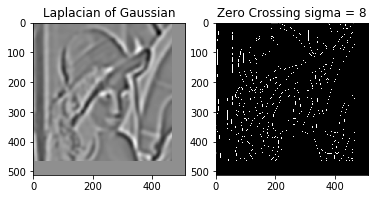

In [6]:
# Final Results
# plotting images
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(log, cmap='gray')
a.set_title('Laplacian of Gaussian')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(zero_crossing, cmap='gray')
string = 'Zero Crossing sigma = '
string += (str(sigma))
a.set_title(string)
plt.show()


# References

1. Gonzalez, R. Woods, “Digital Image Processing”, Addison Wesley, 1993.D. 
2. Marr, E. Hildreth, “Theory of Edge detection”, Proc. R. Soc. Lond., B. 207, 187-217, 1980. http://www.hms.harvard.edu/bss/neuro/bornlab/qmbc/beta/day4/marr-hildreth-edge-prsl1980.pdf
3. Egde Detectors Repository. https://github.com/adl1995/edge-detectors.
4. Campilho, A."Edge Detection". https://web.fe.up.pt/~campilho/PDI/NOTES/EdgeDetection.pdf
